<a href="https://colab.research.google.com/github/hanahmdd/Egypt-Money-Classifier-CNN/blob/main/Egyptian_New_Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydot graphviz

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files


print(f"tensorFlow version: {tf.__version__}")
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f" runing on gpuu: {gpu_devices[0].name}")
else:
    print("remindd me to use gpuu")

tensorFlow version: 2.19.0
 runing on gpuu: /physical_device:GPU:0


In [ ]:

if os.path.exists('egyptian-new-currency-2023.zip'):
    os.remove('egyptian-new-currency-2023.zip')

print("\n upload kaggle.json file")
if not os.path.exists('kaggle.json'):
    files.upload()


os.system('mkdir -p ~/.kaggle')
os.system('cp kaggle.json ~/.kaggle/')
os.system('chmod 600 ~/.kaggle/kaggle.json')

print("downloading dataa")
os.system('kaggle datasets download -d belalsafy/egyptian-new-currency-2023')

print(" unziip")
with zipfile.ZipFile('egyptian-new-currency-2023.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_root')


 upload kaggle.json file


Saving kaggle.json to kaggle.json
downloading dataa
 unziip


In [ ]:

base_path = 'dataset_root'
if 'dataset' in os.listdir(base_path):
    base_path = os.path.join(base_path, 'dataset')


train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'validation')

test_dir = os.path.join(base_path, 'test')
print(f"[INFO] Test Directory:  {test_dir}")


if not os.path.exists(val_dir):
    if os.path.exists(os.path.join(base_path, 'valid')):
        val_dir = os.path.join(base_path, 'valid')
    elif os.path.exists(os.path.join(base_path, 'val')):
        val_dir = os.path.join(base_path, 'val')

print(f"\n[INFO] Train Directory: {train_dir}")
print(f"[INFO] Val Directory:   {val_dir}")

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())
print(f"\n[CHECK] Detected {num_classes} Classes: {class_names}")

[INFO] Test Directory:  dataset_root/dataset/test

[INFO] Train Directory: dataset_root/dataset/train
[INFO] Val Directory:   dataset_root/dataset/valid
Found 2637 images belonging to 9 classes.
Found 760 images belonging to 9 classes.
Found 290 images belonging to 9 classes.

[CHECK] Detected 9 Classes: ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,971,401 (34.22 MB)

 Trainable params: 8,969,033 (34.21 MB)

 Non-trainable params: 2,368 (9.25 KB)

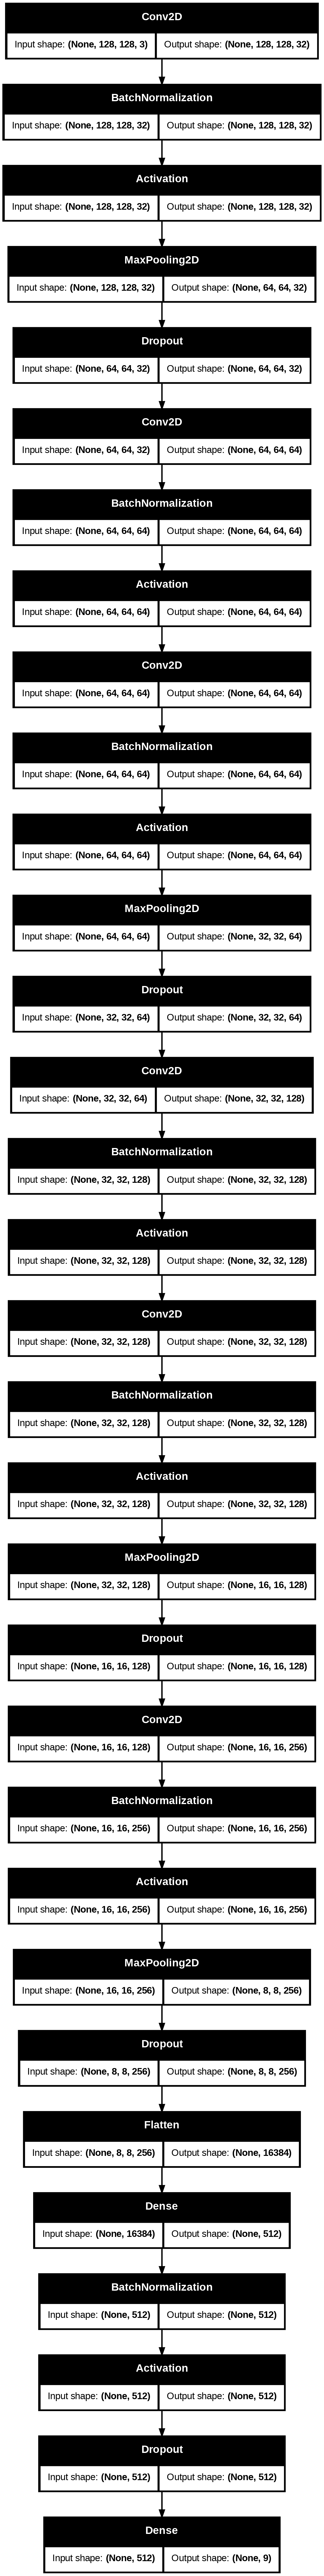

In [ ]:
model = Sequential()

#block 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#block 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#block 4
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#classification
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=0.00001),
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
]

print("\n[startin train")

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks
)


[startin train


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 76s 692ms/step - accuracy: 0.1181 - loss: 2.7611 - val_accuracy: 0.1763 - val_loss: 2.2042 - learning_rate: 0.0010
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 44s 526ms/step - accuracy: 0.2353 - loss: 2.1839 - val_accuracy: 0.1895 - val_loss: 2.2184 - learning_rate: 0.0010
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 45s 535ms/step - accuracy: 0.2873 - loss: 2.0755 - val_accuracy: 0.1816 - val_loss: 2.4230 - learning_rate: 0.0010
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 45s 544ms/step - accuracy: 0.3218 - loss: 1.9603 - val_accuracy: 0.2592 - val_loss: 2.0268 - learning_rate: 0.0010
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 517ms/step - accuracy: 0.3638 - loss: 1.8331 - val_accuracy: 0.2842 - val_loss: 2.1907 - learning_rate: 0.0010
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 521ms/step - accuracy: 0.3874 - loss: 1.7302 - val_accuracy: 0.4013 - val_loss: 1.8641 - learning_rate: 0.0010
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 519ms/step - accuracy: 0.4457 - l

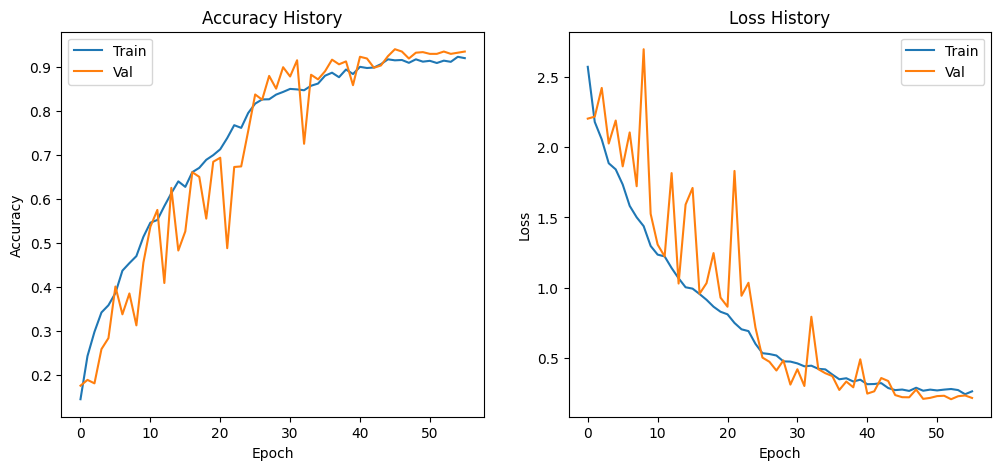


[info] generating confusion matrix on test dataa
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step


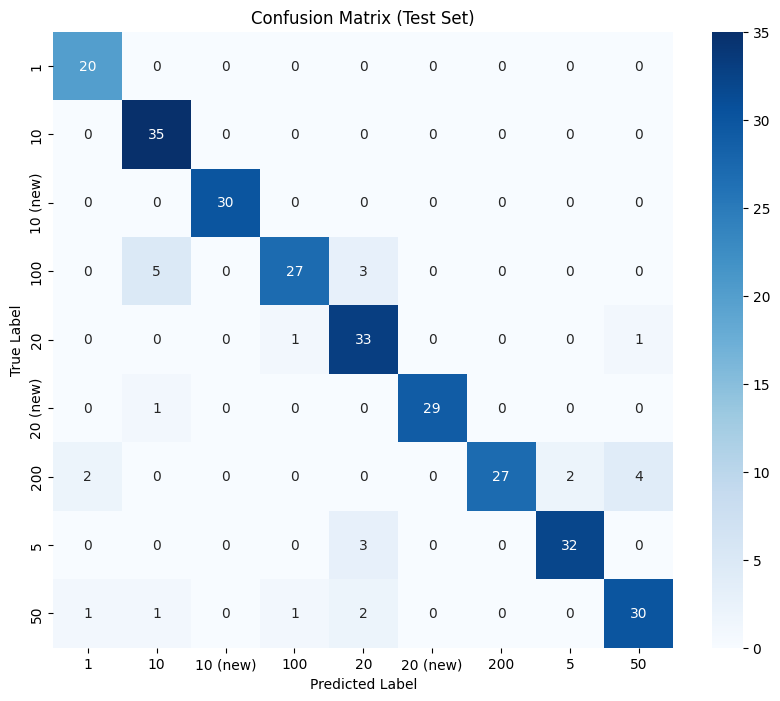


classification report
              precision    recall  f1-score   support

           1       0.87      1.00      0.93        20
          10       0.83      1.00      0.91        35
    10 (new)       1.00      1.00      1.00        30
         100       0.93      0.77      0.84        35
          20       0.80      0.94      0.87        35
    20 (new)       1.00      0.97      0.98        30
         200       1.00      0.77      0.87        35
           5       0.94      0.91      0.93        35
          50       0.86      0.86      0.86        35

    accuracy                           0.91       290
   macro avg       0.92      0.91      0.91       290
weighted avg       0.91      0.91      0.91       290

[infoooo] model saved as 'egyptian_money_custom_cnn.h5'


In [ ]:
#results and visualisation on test set

#ploting training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#confusion matrix
print("\n[info] generating confusion matrix on test dataa")

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

#classification report
print("\nclassification report")
print(classification_report(y_true, y_pred, target_names=class_names))

#savingg model
model.save('egyptian_money_custom_cnn.h5', save_format='h5')
print("[infoooo] model saved as 'egyptian_money_custom_cnn.h5'")

In [ ]:
model.save_weights('egyptian_money_weights.weights.h5')

[info] generating prediction grid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


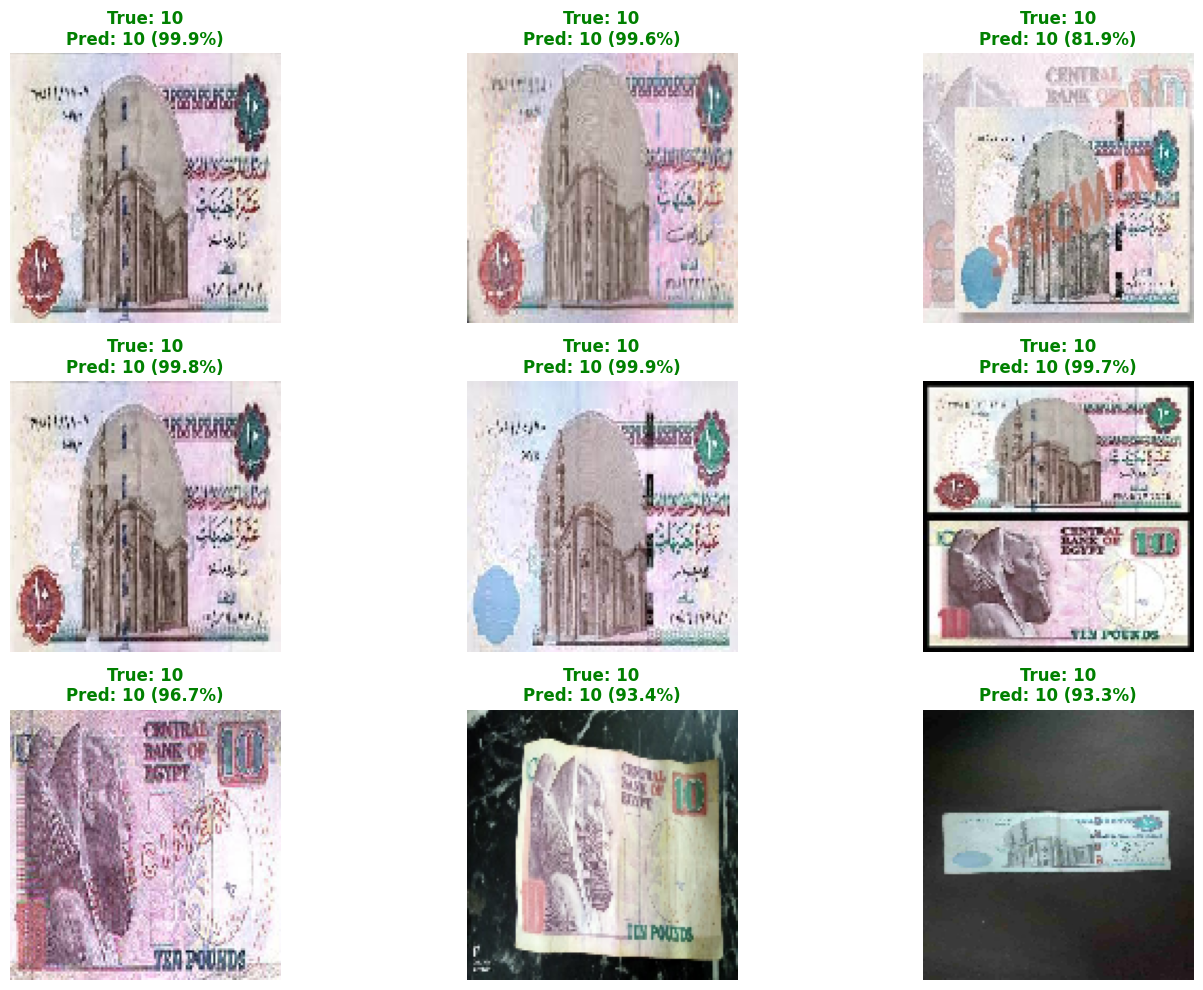

In [ ]:


def plot_predictions(generator, model, num_images=9):
    images, labels = next(generator)
    predictions = model.predict(images)
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(15, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        true_label_index = np.argmax(labels[i])
        pred_label_index = np.argmax(predictions[i])

        true_label = class_names[true_label_index]
        pred_label = class_names[pred_label_index]
        confidence = np.max(predictions[i]) * 100

        color = 'green' if true_label == pred_label else 'red'

        plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)",
                  color=color, fontsize=12, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


print("[info] generating prediction grid")

plot_predictions(test_generator, model, num_images=9)